In [1]:
import pandas as pd

import seaborn as sns

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('train.csv',index_col = "Id")

print(train.shape)

train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv('test.csv', index_col = "Id")

print(test.shape)

test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 탐험적 분석

#### 1. 건물 등급

1. 수치가 높으면 건물가가 높고(or 낮고) 수치가 낮으면 건물가가 낮다(높다.)
2. 5단위로 끊어져 있고 20 ~ 200 정도로 구분되어 있기에 범위를 잘 구분해주면 집값을 예측하는데 도움이 될듯하다.

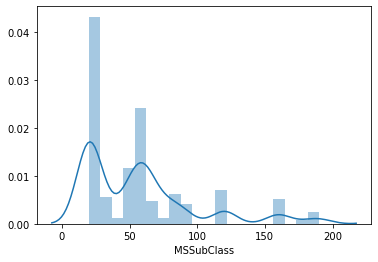

In [5]:
sns.distplot(train["MSSubClass"])

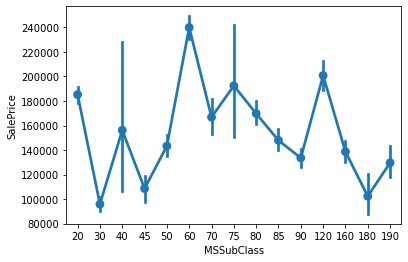

In [6]:
sns.pointplot(data = train, x = "MSSubClass", y = "SalePrice")

분석결과

1. 수치가 곧 가격의 비례를 보여주는 것은 아닌 것 같지만, 등급에 따라 가격수치가 달라지고 있다.
2. 각 수치에 대한 설명을 바탕으로 분석해보면, Newer house 들이 비싸다. older 들이 싸다
3. 160의 경우 newer이지만 가격이 비싼편이 아닌데 그 이유를 확인해볼 필요가 있다. (120, 160의 경우 계획단위개발에 따른 집인데 이것이 집값의 요인이 될 수 있다.)
4. 층별, age, newer, older, PUD 여부에 따라 판매가가 달라질 수 있다.

In [7]:
train_condition1 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 30) | (train["MSSubClass"] == 40) | (train["MSSubClass"] == 120)


train["class_1_story"] = train_condition1

train["class_1_story"].head()

Id
1    False
2     True
3    False
4    False
5    False
Name: class_1_story, dtype: bool

In [8]:
test_condition1 = (test["MSSubClass"] == 20) | (test["MSSubClass"] == 30) | (test["MSSubClass"] == 40) | (test["MSSubClass"] == 120)


test["class_1_story"] = test_condition1

test["class_1_story"].head()

Id
1461     True
1462     True
1463    False
1464    False
1465     True
Name: class_1_story, dtype: bool

In [9]:
condition2 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 60) | (train["MSSubClass"] == 160)

train["class_newer"] = condition2

train["class_newer"].head()

Id
1     True
2     True
3     True
4    False
5     True
Name: class_newer, dtype: bool

In [10]:
test_condition2 = (test["MSSubClass"] == 20) | (test["MSSubClass"] == 60) | (test["MSSubClass"] == 160)

test["class_newer"] = test_condition2

test["class_newer"].head()

Id
1461     True
1462     True
1463     True
1464     True
1465    False
Name: class_newer, dtype: bool

In [11]:
train_condition3 = (train["MSSubClass"] == 30) | (train["MSSubClass"] == 70)

train["class_older"] = train_condition3

train["class_older"].head()

Id
1    False
2    False
3    False
4     True
5    False
Name: class_older, dtype: bool

In [12]:
test_condition3 = (test["MSSubClass"] == 30) | (test["MSSubClass"] == 70)

test["class_older"] = test_condition3

test["class_older"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465    False
Name: class_older, dtype: bool

In [13]:
train_condition4 = (train["MSSubClass"] == 120) | (train["MSSubClass"] == 150) | (train["MSSubClass"] == 160) | (train["MSSubClass"] == 180)

train["class_PUD"] = train_condition4

train["class_PUD"].head()

Id
1    False
2    False
3    False
4    False
5    False
Name: class_PUD, dtype: bool

In [14]:
test_condition4 = (test["MSSubClass"] == 120) | (test["MSSubClass"] == 150) | (test["MSSubClass"] == 160) | (test["MSSubClass"] == 180)

test["class_PUD"] = test_condition4

test["class_PUD"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465     True
Name: class_PUD, dtype: bool

In [15]:
train_condition5 = (train["MSSubClass"] == 60) | (train["MSSubClass"] == 70) | (train["MSSubClass"] == 160)


train["class_2_story"] = train_condition5

train["class_2_story"].head()

Id
1     True
2    False
3     True
4     True
5     True
Name: class_2_story, dtype: bool

In [16]:
test_condition5 = (test["MSSubClass"] == 60) | (test["MSSubClass"] == 70) | (test["MSSubClass"] == 160)


test["class_2_story"] = test_condition5

test["class_2_story"].head()

Id
1461    False
1462    False
1463     True
1464     True
1465    False
Name: class_2_story, dtype: bool

In [17]:
train_condition6 = (train["MSSubClass"] == 40) | (train["MSSubClass"] == 45) | (train["MSSubClass"] == 50) | (train["MSSubClass"] == 75) | (train["MSSubClass"] == 90) \
                 | (train["MSSubClass"] == 150) | (train["MSSubClass"] == 190)

train["class_ages"] = train_condition6

train["class_ages"].head()

Id
1    False
2    False
3    False
4    False
5    False
Name: class_ages, dtype: bool

In [18]:
test_condition6 = (test["MSSubClass"] == 40) | (test["MSSubClass"] == 45) | (test["MSSubClass"] == 50) | (test["MSSubClass"] == 75) | (test["MSSubClass"] == 90) \
                 | (test["MSSubClass"] == 150) | (test["MSSubClass"] == 190)

test["class_ages"] = test_condition6

test["class_ages"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465    False
Name: class_ages, dtype: bool

In [19]:
import matplotlib.pyplot as plt

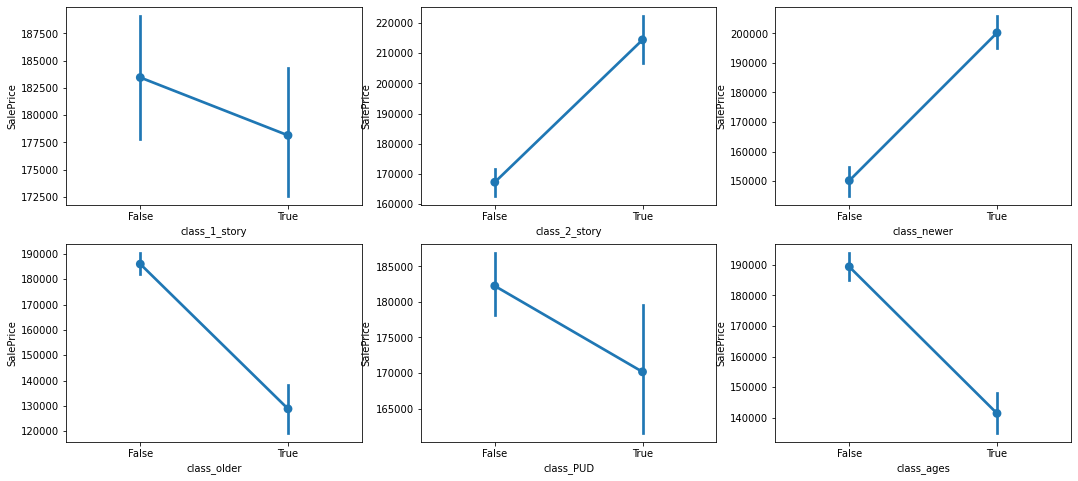

In [20]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.pointplot(data = train, x = "class_1_story", y = "SalePrice", ax = ax1)
sns.pointplot(data = train, x = "class_2_story", y = "SalePrice", ax = ax2)
sns.pointplot(data = train, x = "class_newer", y = "SalePrice", ax = ax3)
sns.pointplot(data = train, x = "class_older", y = "SalePrice", ax = ax4)
sns.pointplot(data = train, x = "class_PUD", y = "SalePrice", ax = ax5)
sns.pointplot(data = train, x = "class_ages", y = "SalePrice", ax = ax6)

In [21]:
train_condition7 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 90)

train["class_styles"] = train_condition7

train["class_styles"].head()

Id
1    False
2     True
3    False
4    False
5    False
Name: class_styles, dtype: bool

In [22]:
test_condition7 = (test["MSSubClass"] == 20) | (test["MSSubClass"] == 90)

test["class_styles"] = test_condition7

test["class_styles"].head()

Id
1461     True
1462     True
1463    False
1464    False
1465    False
Name: class_styles, dtype: bool

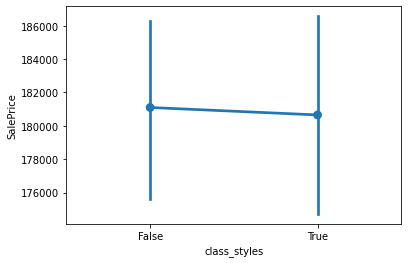

In [23]:
sns.pointplot(data = train, x = "class_styles", y = "SalePrice")

1. 1층 여부는 모수가 적지만 1층인 경우 값이 싸지는 경향이 있다. 하지만 2층 여부에 따른 가격차이는 의미있게 나타난다. 즉, 2층집은 비싸다
2. 새집은 비싸고 헌집은 싸다.
3. PUD(계획개발)의 여부가 가격차이에 영향을 준다고 볼 수 있다.
4. age여부에 따라 가격차이가 크다

#### 2. 지역분류

1. 지역은 농지, 상업, 물위마을주거, 산업지, 주거(과밀, 저밀, 저밀(공원), 중밀)
2. 상업, 주거중, 과밀 지역의 건물값이 비쌀 것이다.(유동인구가 많은 지역은 땅값이 비싸기 때문에)
3. 물위마을지역 건물은 상대적으로 쌀 것이다.(접근성이 떨어짐)
4. 농지, 산업지는 특수목적이므로 상대적으로 유동인구도 적고 땅값도 쌀 것이다?

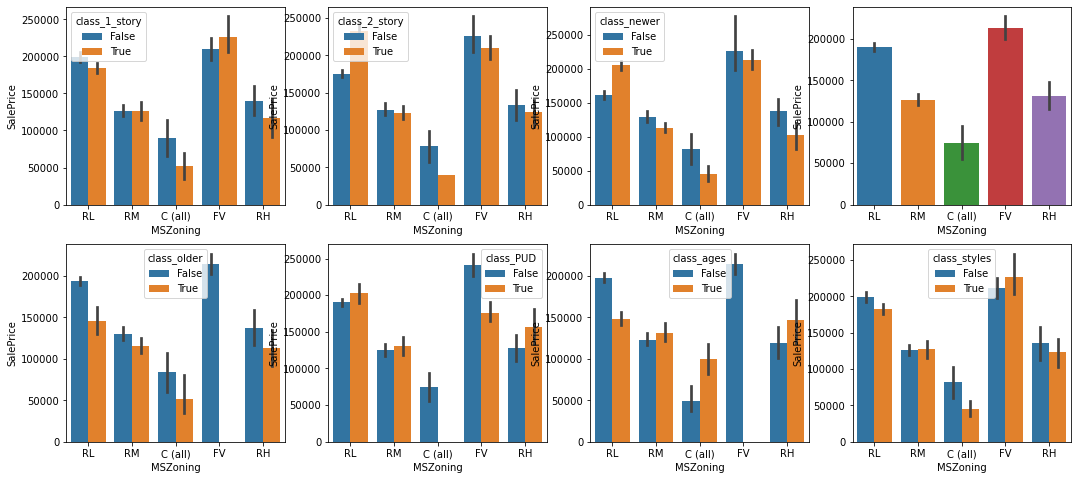

In [24]:
figure, ((ax1, ax2, ax3, ax7), (ax4, ax5, ax6, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(18, 8)


sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_1_story", ax = ax1)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_2_story", ax = ax2)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_newer", ax = ax3)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_older", ax = ax4)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_PUD", ax = ax5)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_ages", ax = ax6)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", ax = ax7)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_styles", ax = ax8)

##### 분석결과

1. 분석은 정반대로 유동인구가 적고, floating village 의 건물가격이 더 비싸다
2. RM과 RH의 차이는 거의 없으며, C가 유독 가격이 싸다는 것은 눈여겨볼 만하다.
3. 따라서 건물class와 같이 분석해 볼 필요가 있다.

In [25]:
data3 = train[(train["class_newer"]== True) & (train["MSZoning"]).str.contains("RL")]
data3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,class_1_story,class_newer,class_older,class_PUD,class_2_story,class_ages,class_styles
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,False,True,False,False,True,False,False
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,True,True,False,False,False,False,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,False,True,False,False,True,False,False
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,False,True,False,False,True,False,False
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,307000,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Abnorml,84500,True,True,False,False,False,False,True
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,175000,False,True,False,False,True,False,False
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,210000,True,True,False,False,False,False,True


In [26]:
train["MSZoning"].str.contains("RL").value_counts()

True     1151
False     309
Name: MSZoning, dtype: int64

4. 상업지역에서는 1층건물이 아닌경우가 더 비싸다(하지만 상업건물전체 모수가 적다.)
5. 전체적으로는 class_ages 에 따라 가격이 떨어지는데 상업건물은 반대현상이 나타난다.
6. 다른 지역보다 데이터가 많은 RL에서의 결과를 중점적으로 보면 좋을듯하다.

In [27]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### 3.연결된 길거리와의 거리

1. 연속형데이터 이므로 정규분포형태가 나타날 것이고, 특이한구간이 있다면 그구간은 길게 늘어지는 형태가 될 것이다.
2. 길거리에 가까울수록 땅값이 높은 경향이 나타날 것이다.(역세권, 상권 등등)

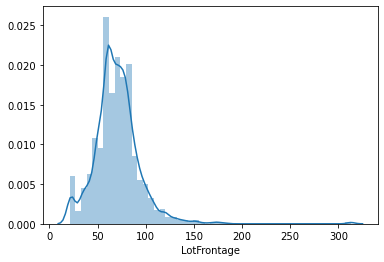

In [28]:
sns.distplot(train["LotFrontage"])

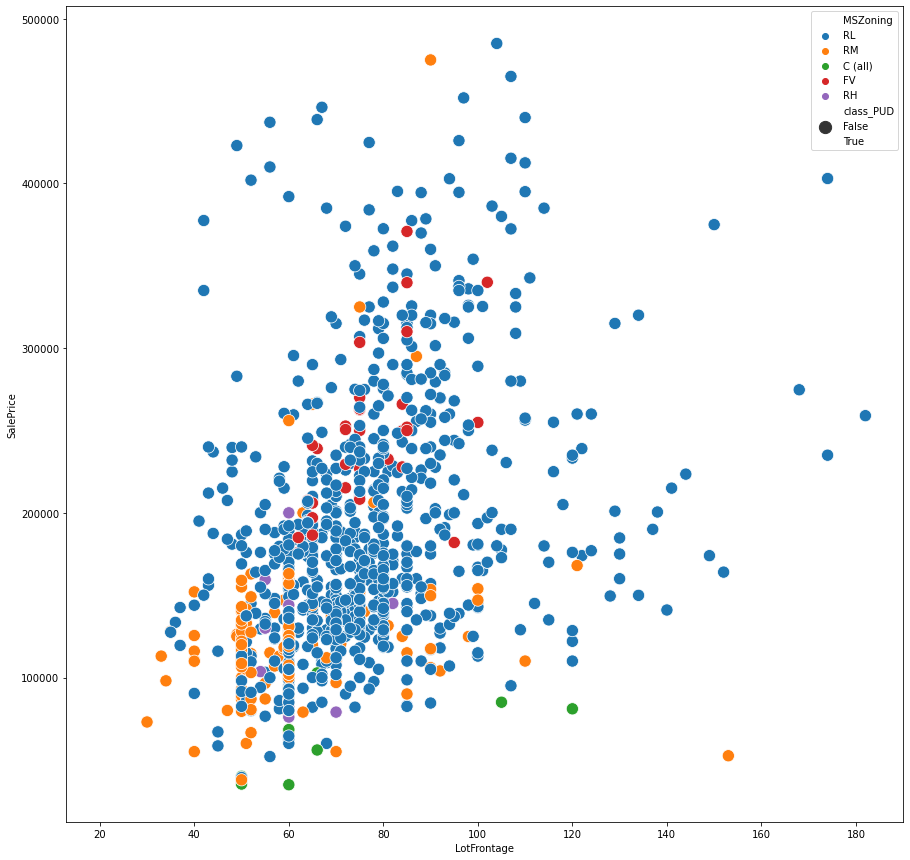

In [29]:
low_price = train[(train["SalePrice"] <= 500000) & (train["LotFrontage"] < 200)]
plt.figure(figsize = (15,15))
sns.scatterplot(data=low_price,x="LotFrontage",y="SalePrice",size="class_PUD",sizes=(0,150), hue = "MSZoning")

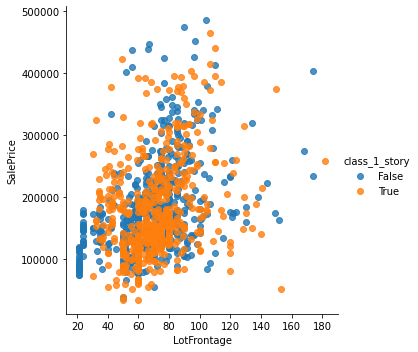

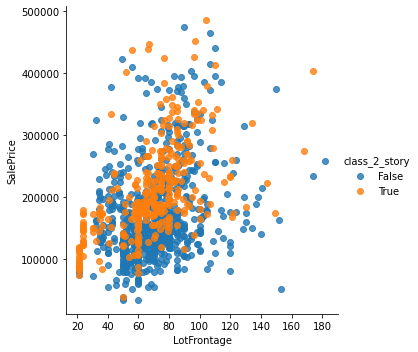

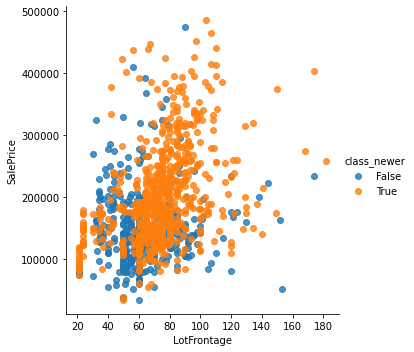

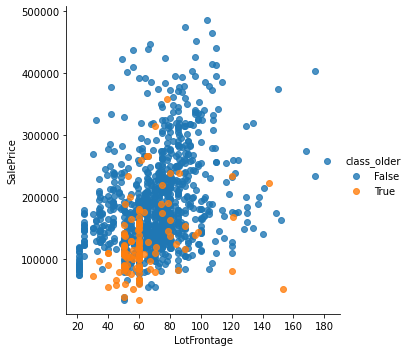

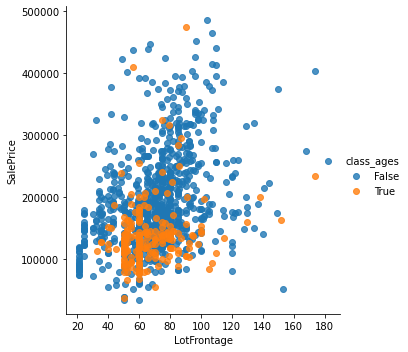

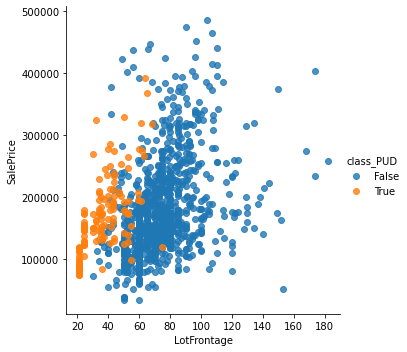

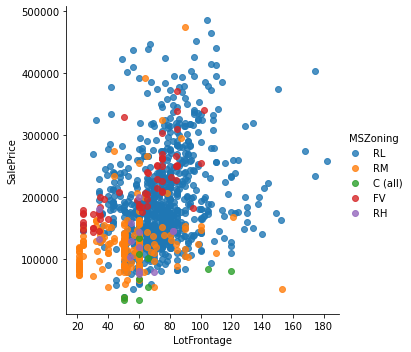

In [30]:
low_price = train[(train["SalePrice"] <= 500000) & (train["LotFrontage"] < 200)]


sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_1_story", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_2_story", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_newer", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_older", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_ages", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_PUD", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="MSZoning", fit_reg=False)


### 분석결과

1. 상관관계는 거의 없어보인다.

### MSZoning 전처리

In [31]:
train["RL"] = train["MSZoning"].str.contains("RL")
train["RM"] = train["MSZoning"].str.contains("RM")
train["C"] = train["MSZoning"].str.contains("all")
train["FV"] = train["MSZoning"].str.contains("FV")
train["RH"] = train["MSZoning"].str.contains("RH")
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,class_older,class_PUD,class_2_story,class_ages,class_styles,RL,RM,C,FV,RH
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,True,False,False,True,False,False,False,False
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,False,False,False,True,True,False,False,False,False
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,False,True,False,False,True,False,False,False,False
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,True,False,True,False,False,True,False,False,False,False
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,False,True,False,False,True,False,False,False,False


In [32]:
test["MSZoning(clean)"] = test["MSZoning"].fillna("Nonetype")
test["RL"] = test["MSZoning"].notnull() & test["MSZoning"].str.contains("RL")
test["RM"] = test["MSZoning"].notnull() & test["MSZoning(clean)"].str.contains("RM")
test["C"] = test["MSZoning"].notnull() & test["MSZoning(clean)"].str.contains("all")
test["FV"] = test["MSZoning"].notnull() & test["MSZoning(clean)"].str.contains("FV")
test["RH"] = test["MSZoning"].notnull() & test["MSZoning(clean)"].str.contains("RH")
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,class_PUD,class_2_story,class_ages,class_styles,MSZoning(clean),RL,RM,C,FV,RH
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,RH,False,False,False,False,True
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,False,False,True,RL,True,False,False,False,False
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,True,False,False,RL,True,False,False,False,False
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,True,False,False,RL,True,False,False,False,False
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,True,False,False,False,RL,True,False,False,False,False


### LotFrontage 전처리

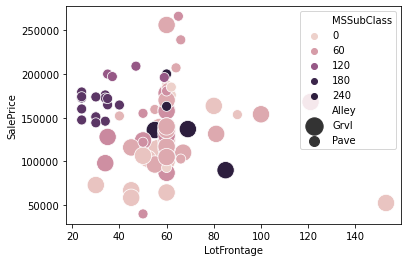

In [33]:
sns.scatterplot(data = train, x = "LotFrontage", y = "SalePrice", hue = "MSSubClass", size = "Alley", sizes = (100, 300))

1. Alley에 따라서 판매가가 의미있게 달라진다. LotFrontage 40 정도가 경계로 보인다

In [34]:
train["LotFrontage(less_40)"] = train["LotFrontage"] <= 40
test["LotFrontage(less_40)"] = test["LotFrontage"] <= 40

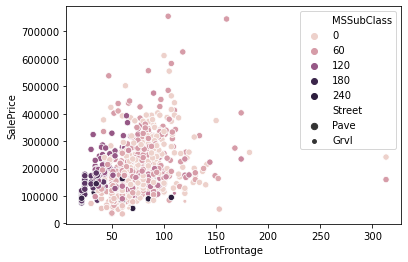

In [35]:
sns.scatterplot(data = train, x = "LotFrontage", y = "SalePrice", hue = "MSSubClass", size = "Street", sizes = (15, 40))

#### 1. 가까우면 비싼 경향이 있지만 포장도로인 경우에만 해당!!

In [36]:
train["LotFrontage"].mean()

70.04995836802665

In [37]:
train["LotFrontage(clean)"] = train["LotFrontage"]
train.loc[train["LotFrontage(clean)"].isnull(), "LotFrontage(clean)"] = train["LotFrontage(clean)"].mean()

In [38]:
test["LotFrontage(clean)"] = test["LotFrontage"]
test.loc[test["LotFrontage(clean)"].isnull(), "LotFrontage(clean)"] = test["LotFrontage(clean)"].mean()

### landcontour 전처리

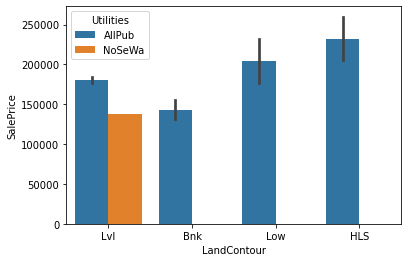

In [39]:
sns.barplot(data = train, x = "LandContour", y = "SalePrice", hue = "Utilities")

In [40]:
train["Lv1"] = train["LandContour"] == "Lv1"
train["Bnk"] = train["LandContour"] == "Bnk"
train["Low"] = train["LandContour"] == "Low"
train["HLS"] = train["LandContour"] == "HLS"

In [41]:
test["Lv1"] = test["LandContour"] == "Lv1"
test["Bnk"] = test["LandContour"] == "Bnk"
test["Low"] = test["LandContour"] == "Low"
test["HLS"] = test["LandContour"] == "HLS"

### Street와 Alley 전처리

1. Alley의 경우 lotfrontage 와의 관계에서 전처리를 잘 해주면 된다.

In [42]:
train["Pave"] = (train["Street"].notnull()) & (train["Street"] == "Pave")
test["Pave"] = (train["Street"].notnull()) & (test["Street"] == "Pave")

In [43]:
train["Pave(alley)"] = (train["Alley"].notnull()) & (train["Alley"] == "Pave")
test["Pave(alley)"] = (test["Alley"].notnull()) & (test["Alley"] == "Pave")

### Utilities 전처리

In [44]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

데이터가 의미있게 분배되어있지 않다.

### LotConfig

1. LotConfig는 LotShape 과 연관이 있을것이라 생각한다.

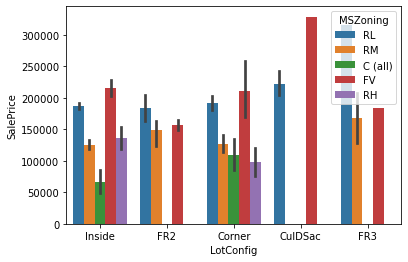

In [45]:
sns.barplot(data = train , x = "LotConfig", y = "SalePrice", hue = "MSZoning")

2. 오히려 MSZoning에 따라서 가격 차이가 의미있게 나타난다.

### 전처리

In [46]:
train["LotConfig(inside)"] = train["LotConfig"] == "Inside"
train["LotConfig(FR2)"] = train["LotConfig"] == "FR2"
train["LotConfig(corner)"] = train["LotConfig"] == "Corner LotConfig"
train["LotConfig(CulDSac)"] = train["LotConfig"] == "CulDSac"
train["LotConfig(FR3)"] = train["LotConfig"] == "FR3"

In [47]:
test["LotConfig(inside)"] = test["LotConfig"] == "Inside"
test["LotConfig(FR2)"] = test["LotConfig"] == "FR2"
test["LotConfig(corner)"] = test["LotConfig"] == "Corner LotConfig"
test["LotConfig(CulDSac)"] = test["LotConfig"] == "CulDSac"
test["LotConfig(FR3)"] = test["LotConfig"] == "FR3"

In [48]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

### Neighborhood

In [49]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

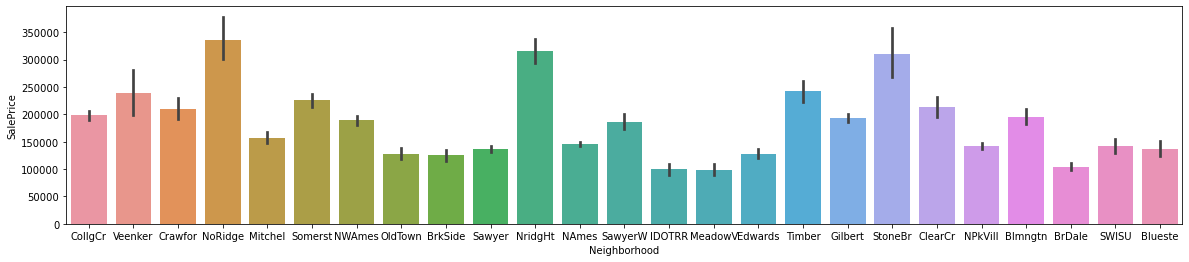

In [50]:
plt.figure(figsize = (20, 4))
sns.barplot(data = train, x = "Neighborhood", y = "SalePrice")

전처리가 필요해보인다!!

In [51]:
neighborhood_list = train["Neighborhood"].unique()

In [52]:
for neighbor in neighborhood_list:
    train[f"{neighbor}"] = train["Neighborhood"] == f"{neighbor}"
    test[f"{neighbor}"] = test["Neighborhood"] == f"{neighbor}"

In [53]:
neighborhood_list

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

### Condition1 & 2

In [54]:
train["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

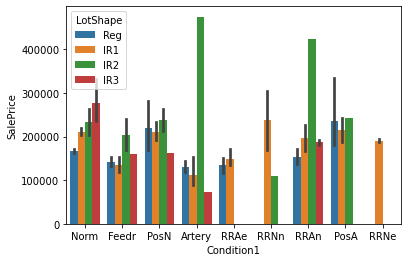

In [55]:
sns.barplot(data = train, x = "Condition1", y = "SalePrice", hue = "LotShape")

In [56]:
train["Condition2"].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

의미있지 않다

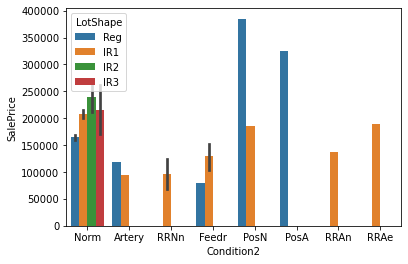

In [57]:
sns.barplot(data = train, x = "Condition2", y = "SalePrice", hue = "LotShape")

In [58]:
train["Artery"] = train["Condition1"] == "Artery"
test["Artery"] = test["Condition1"] == "Artery"
train["RRAn"] = train["Condition1"] == "RRAn"
test["RRAn"] = test["Condition1"] == "RRAn"

### Bldgtype

In [59]:
train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

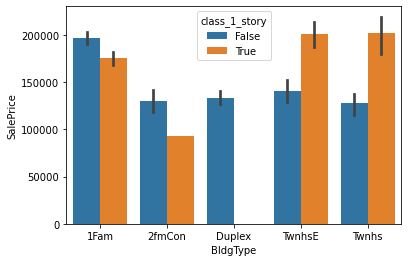

In [60]:
sns.barplot(data = train, x = "BldgType", y = "SalePrice", hue = "class_1_story")

In [61]:
BldgType_list = train["BldgType"].unique()
for type1 in BldgType_list:
    train[f"{type1}"] = train["Neighborhood"] == f"{type1}"
    test[f"{type1}"] = test["Neighborhood"] == f"{type1}"

In [62]:
train["1Fam"]

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: 1Fam, Length: 1460, dtype: bool

### overallQual

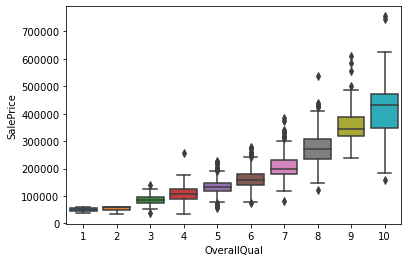

In [63]:
sns.boxplot(data = train, x = "OverallQual", y = "SalePrice")

1. 퀄리티에 따라 가격상승이 일어나는 것은 당연한듯 나타났다

### overallcond

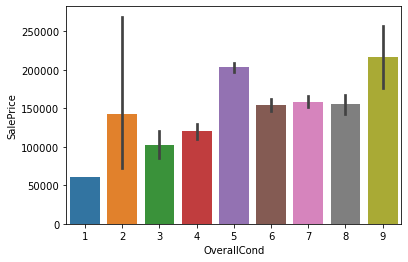

In [64]:
sns.barplot(data = train, x = "OverallCond", y = "SalePrice")

In [65]:
train["OverallCond"].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

5의 여부가 중요한 지표가 될 수 있다.

### 전처리

In [66]:
train["OverallCond(5)"] = train["OverallCond"] == 5
test["OverallCond(5)"] = test["OverallCond"] == 5

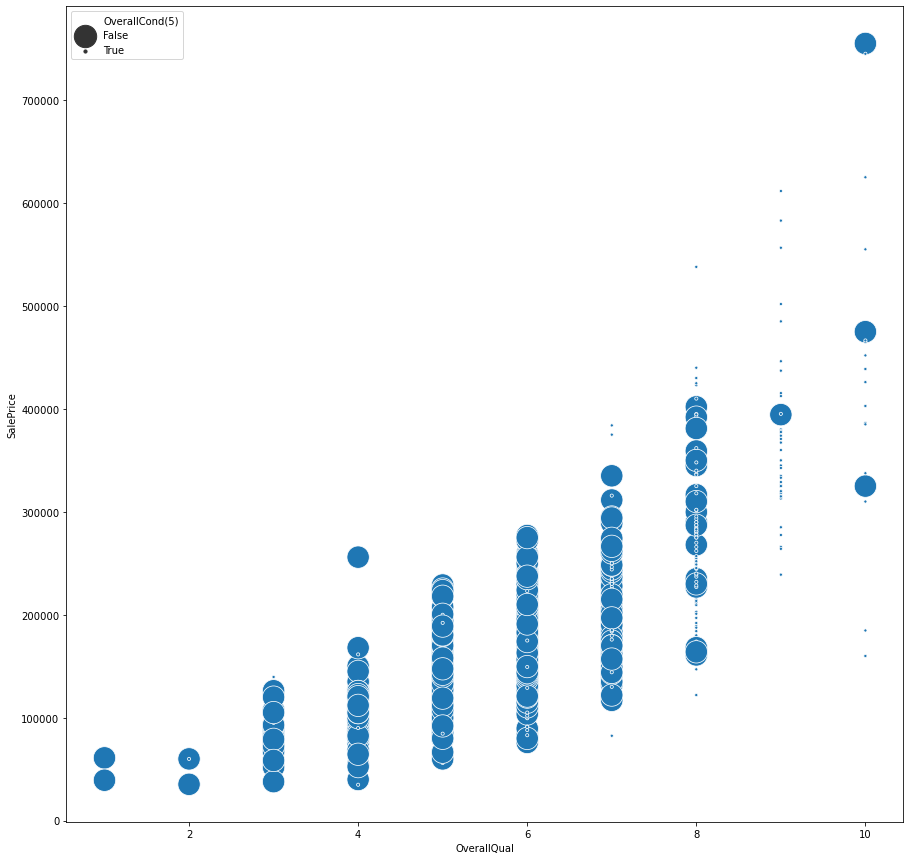

In [67]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data =train, x = "OverallQual", y = "SalePrice", size = "OverallCond(5)", sizes = (10, 500))

퀄리티가 좋은 집일수록 Cond로 5를 사용한다.

### YearBulit

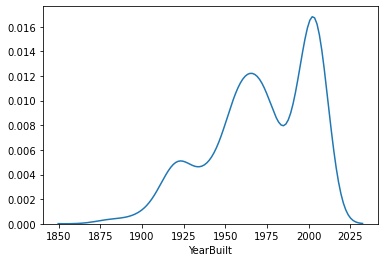

In [68]:
sns.distplot(train["YearBuilt"], hist = False)

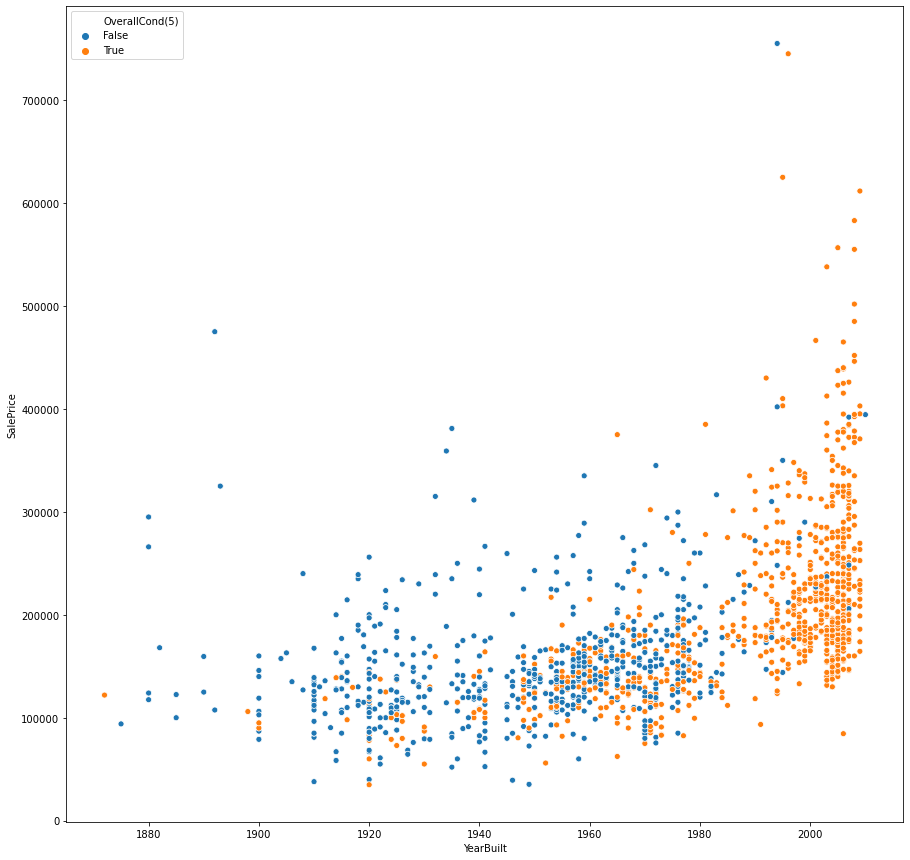

In [69]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data =train , x = "YearBuilt", y = "SalePrice", hue = "OverallCond(5)")

In [70]:
train["YearBuilt(1940)"] = train["YearBuilt"] <= 1940
train["YearBuilt(1980)"] = (train["YearBuilt"] <= 1980) & (train["YearBuilt"] > 1940)
train["YearBuilt(more)"] = train["YearBuilt"] > 1980

In [71]:
test["YearBuilt(1940)"] = test["YearBuilt"] <= 1940
test["YearBuilt(1980)"] = (test["YearBuilt"] <= 1980) & (test["YearBuilt"] > 1940)
test["YearBuilt(more)"] = test["YearBuilt"] > 1980

### YearRemodAdd

In [72]:
train["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

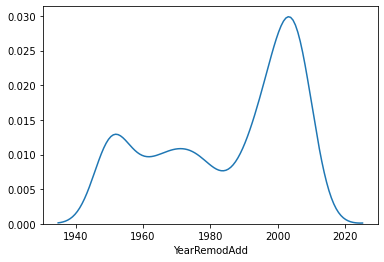

In [73]:
sns.distplot(train["YearRemodAdd"], hist = False)

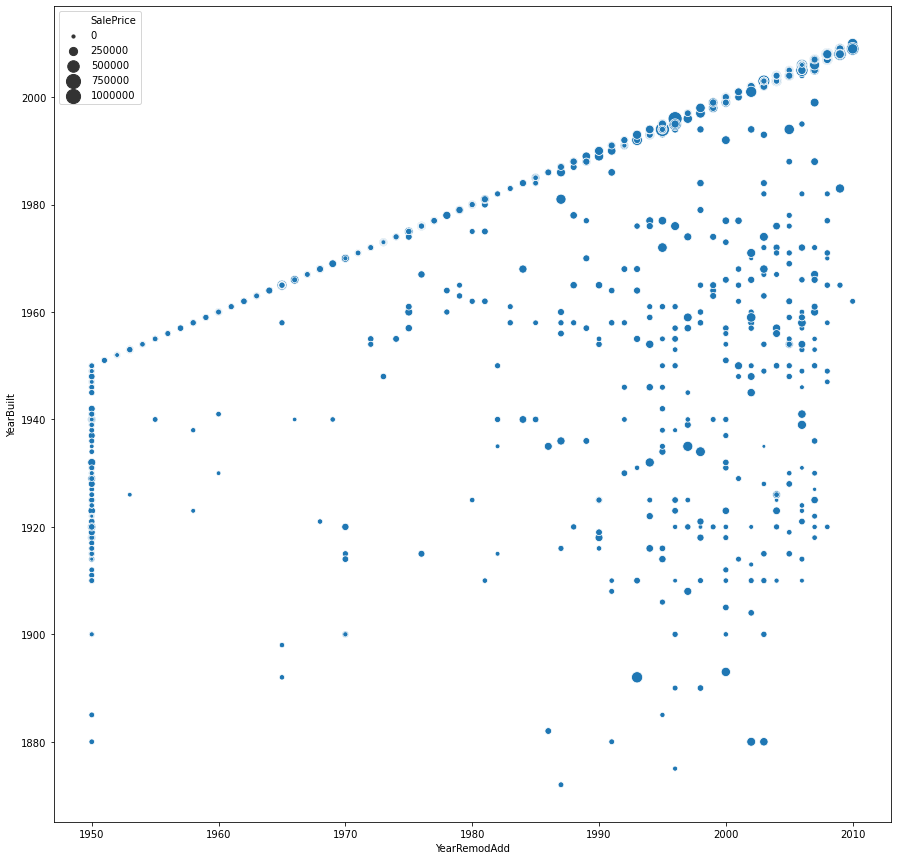

In [74]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data =train , x = "YearRemodAdd", size = "SalePrice", y = "YearBuilt", cmap = "Oranges", sizes = (10, 200))

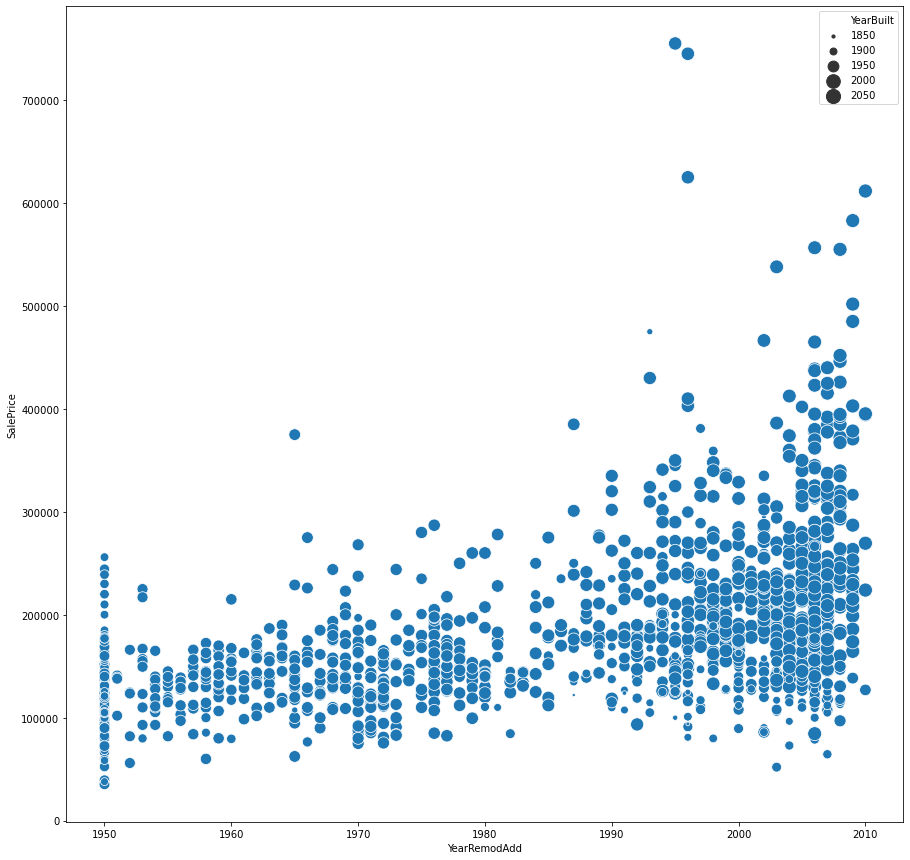

In [75]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data =train , x = "YearRemodAdd", y = "SalePrice", size = "YearBuilt", cmap = "Oranges", sizes = (10, 200))

In [76]:
train["YearRemodAdd(1980)"] = train["YearRemodAdd"] <= 1980
test["YearRemodAdd(1980)"] = test["YearRemodAdd"] <= 1980

### HouseStyle

1. mssubclass 와 연관이 있을거라 본다.
2. 주거형태인데 방이 많으면 당연히 비쌀 것이다.

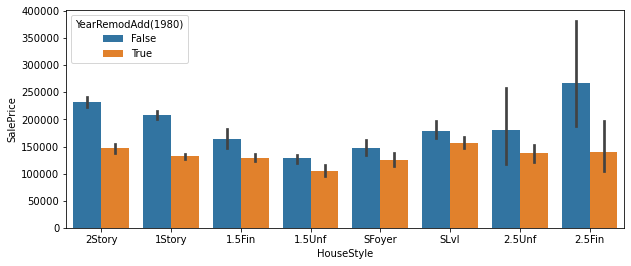

In [77]:
plt.figure(figsize = (10, 4))
sns.barplot(data = train, x = "HouseStyle", y = "SalePrice", hue = "YearRemodAdd(1980)")

1. 방하나보단 2개가 비싸고, unf 보다 Fin이 더 비싸다

In [78]:
train["HouseStyle(1story)"] = train["HouseStyle"] == "1Story"
train["HouseStyle(2story)"] = train["HouseStyle"] == "2Story"
train["HouseStyle(Unf)"] = train["HouseStyle"].str.contains("Unf")
train["HouseStyle(Fin)"] = train["HouseStyle"].str.contains("Fin")

In [79]:
test["HouseStyle(1story)"] = test["HouseStyle"] == "1Story"
test["HouseStyle(2story)"] = test["HouseStyle"] == "2Story"
test["HouseStyle(Unf)"] = test["HouseStyle"].str.contains("Unf")
test["HouseStyle(Fin)"] = test["HouseStyle"].str.contains("Fin")

In [80]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [81]:
test["HouseStyle"].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

Unf 여부는 없애는 게 좋을듯 하다

### RoofStyle

In [82]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

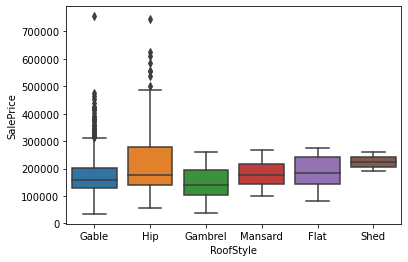

In [83]:
sns.boxplot(data = train , x = "RoofStyle", y = "SalePrice")

다른 데이터에 비해 Gable, Hip의 경우 값이 높은 집이 꽤 있다.

In [84]:
train["RoofStyle(Gable)"] = train["RoofStyle"] == "Gable"
train["RoofStyle(Hip)"] = train["RoofStyle"] == "Hip"
test["RoofStyle(Gable)"] = test["RoofStyle"] == "Gable"
test["RoofStyle(Hip)"] = test["RoofStyle"] == "Hip"


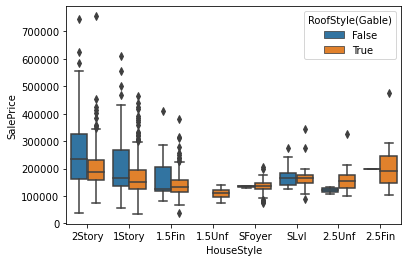

In [85]:
sns.boxplot(data = train , x = "HouseStyle", y = "SalePrice", hue = "RoofStyle(Gable)")

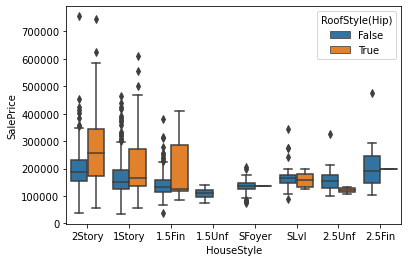

In [86]:
sns.boxplot(data = train , x = "HouseStyle", y = "SalePrice", hue = "RoofStyle(Hip)")

Gable이 아닌경우 더 비싼 집이 많고, Hip을 지붕으로 한 경우 값이 더 비싸다.

In [87]:
test["RoofStyle"].value_counts()

Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64

### RoofMatl

In [88]:
train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

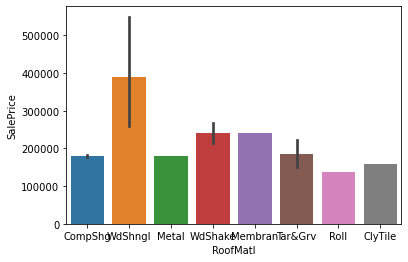

In [89]:
sns.barplot(data = train, x = "RoofMatl", y = "SalePrice")

WdShngl 정도만 feature로 넣자 (데이터가 너무 적다)

In [90]:
train["RoofMatl(WdShngl)"] = train["RoofMatl"] == "WdShngl"
test["RoofMatl(WdShngl)"] = test["RoofMatl"] == "WdShngl"

### Exterior1st

In [91]:
train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

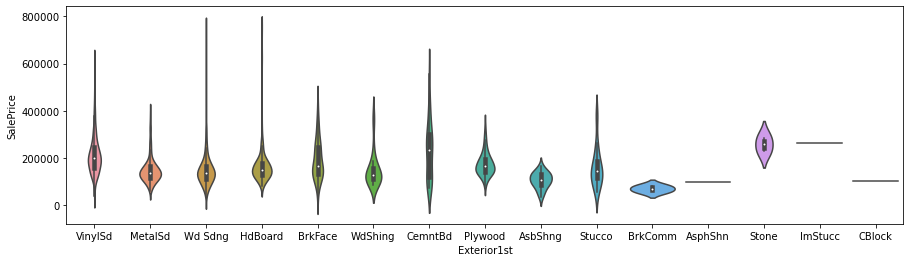

In [92]:
plt.figure(figsize = (15, 4))
sns.violinplot(data = train, x = "Exterior1st", y = "SalePrice")

의미있는 데이터 100개이상을 기준으로해서 전처리해보자

### 전처리

In [93]:
train["Exterior1st(VinylSd)"] = train["Exterior1st"] == "VinylSd"
train["Exterior1st(MetalSd)"] = train["Exterior1st"] == "MetalSd"
train["Exterior1st(Wd Sdng)"] = train["Exterior1st"] == "Wd Sdng"
train["Exterior1st(HdBoard)"] = train["Exterior1st"] == "HdBoard"
train["Exterior1st(Plywood)"] = train["Exterior1st"] == "Plywood"

In [94]:
test["Exterior1st(VinylSd)"] = test["Exterior1st"] == "VinylSd"
test["Exterior1st(MetalSd)"] = test["Exterior1st"] == "MetalSd"
test["Exterior1st(Wd Sdng)"] = test["Exterior1st"] == "Wd Sdng"
test["Exterior1st(HdBoard)"] = test["Exterior1st"] == "HdBoard"
test["Exterior1st(Plywood)"] = test["Exterior1st"] == "Plywood"

### Exterior2nd

첫번째와 비슷한 양상??

In [95]:
train["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

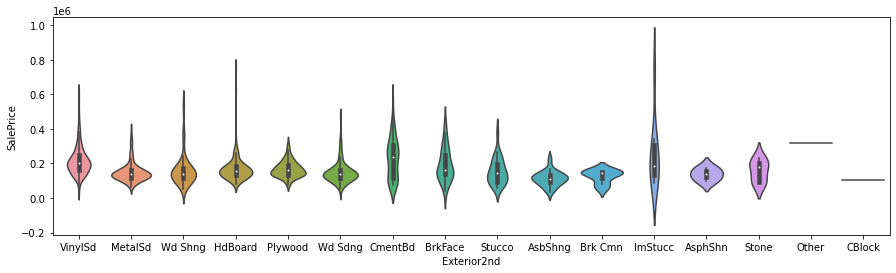

In [96]:
plt.figure(figsize = (15, 4))
sns.violinplot(data = train, x = "Exterior2nd", y = "SalePrice")

마찬가지로 기준 100개로 전처리

In [97]:
train["Exterior2nd(VinylSd)"] = train["Exterior2nd"] == "VinylSd"
train["Exterior2nd(MetalSd)"] = train["Exterior2nd"] == "MetalSd"
train["Exterior2nd(Wd Sdng)"] = train["Exterior2nd"] == "Wd Sdng"
train["Exterior2nd(HdBoard)"] = train["Exterior2nd"] == "HdBoard"
train["Exterior2nd(Plywood)"] = train["Exterior2nd"] == "Plywood"

In [98]:
test["Exterior2nd(VinylSd)"] = test["Exterior2nd"] == "VinylSd"
test["Exterior2nd(MetalSd)"] = test["Exterior2nd"] == "MetalSd"
test["Exterior2nd(Wd Sdng)"] = test["Exterior2nd"] == "Wd Sdng"
test["Exterior2nd(HdBoard)"] = test["Exterior2nd"] == "HdBoard"
test["Exterior2nd(Plywood)"] = test["Exterior2nd"] == "Plywood"

### MasVnrType

In [99]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

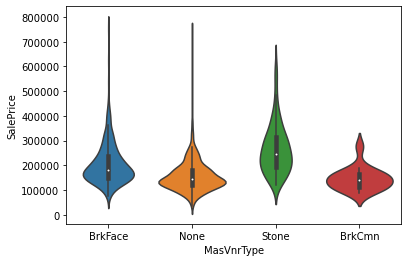

In [100]:
sns.violinplot(data = train , x = "MasVnrType", y = "SalePrice")

In [101]:
pd.pivot_table(train , index = "MasVnrType", values = "SalePrice")

,SalePrice
MasVnrType,
BrkCmn,146318.066667
BrkFace,204691.871910
None,156221.891204
Stone,265583.625000


돌이 확실히 비싸게 사용되며 BrkCmn은 안쓴것과 차이가 없다

### 전처리

In [102]:
train["MasVnrType(BrkFace)"] = train["MasVnrType"] == "BrkFace"
train["MasVnrType(None)"] = train["MasVnrType"] == "None"
train["MasVnrType(Stone)"] = train["MasVnrType"] == "Stone"

In [103]:
test["MasVnrType(BrkFace)"] = test["MasVnrType"] == "BrkFace"
test["MasVnrType(None)"] = test["MasVnrType"] == "None"
test["MasVnrType(Stone)"] = test["MasVnrType"] == "Stone"

### MasVnrArea

In [104]:
train["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

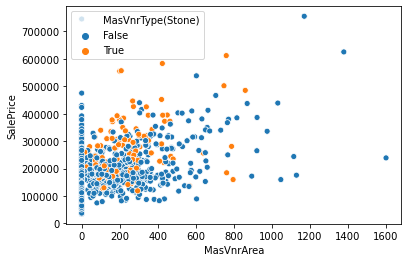

In [105]:
sns.scatterplot(data = train, x = "MasVnrArea", y = "SalePrice", hue = "MasVnrType(Stone)")

Area는 큰 영향은 없어보인다

### ExterQual

#### 퀄리티 높으면 당연 비쌀듯!

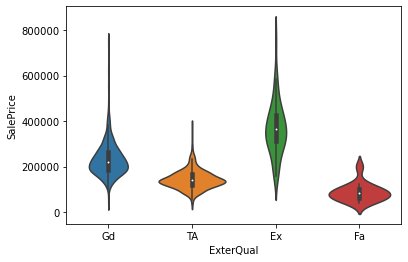

In [106]:
sns.violinplot(data = train, x = "ExterQual", y = "SalePrice")

예상과 일치한다 이것을 전처리해야한다

In [107]:
train["ExterQual(clean)"] = train["ExterQual"].replace("Ex", 4).replace("TA", 2).replace("Gd", 3).replace("Fa", 1)
test["ExterQual(clean)"] = test["ExterQual"].replace("Ex", 4).replace("TA", 2).replace("Gd", 3).replace("Fa", 1)

### ExterCond

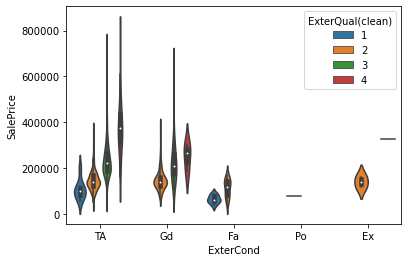

In [108]:
sns.violinplot(data = train, x = "ExterCond", y = "SalePrice", hue = "ExterQual(clean)")

In [109]:
train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

큰영향을 준다고 보긴 어렵다

### Foundation

사용한 재료에 따라 건물가격도 달라질 것이다.(비싼거 쓰면 가격도 상승 예상)

In [144]:
train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [145]:
pd.pivot_table(train, index = "Foundation", values = "SalePrice")

,SalePrice
Foundation,
BrkTil,132291.075342
CBlock,149805.714511
PConc,225230.442040
Slab,107365.625000
Stone,165959.166667
Wood,185666.666667


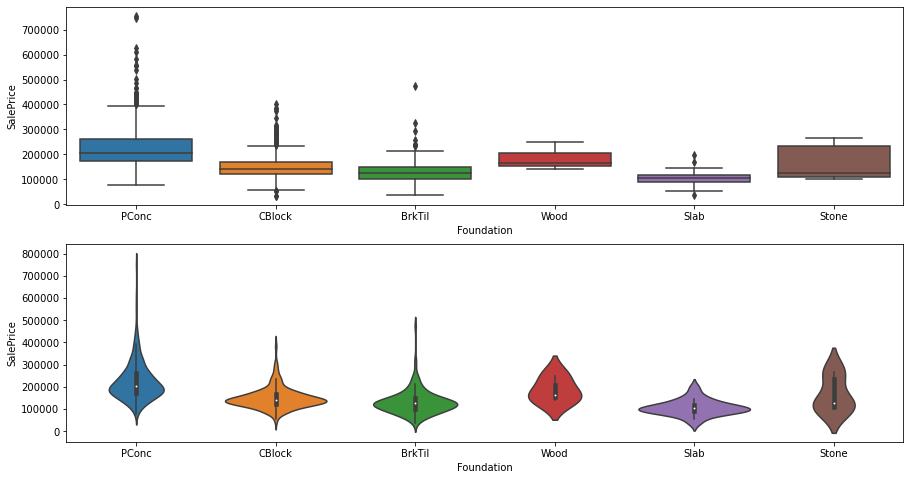

In [149]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(15, 8)

sns.boxplot(data = train, x = "Foundation", y = "SalePrice", ax = ax1)
sns.violinplot(data = train, x = "Foundation", y = "SalePrice", ax = ax2)

PConc, Wood, Stone, Slab 여부를 feature를 두면 가격 예측에 도움이 될것으로 보인다.

#### 전처리

In [150]:
train["Foundation(PConc)"] = train["Foundation"] == "PConc"
train["Foundation(Wood)"] = train["Foundation"] == "Wood"
train["Foundation(Slab)"] = train["Foundation"] == "Slab"
train["Foundation(Stone)"] = train["Foundation"] == "Stone"

In [151]:
test["Foundation(PConc)"] = test["Foundation"] == "PConc"
test["Foundation(Wood)"] = test["Foundation"] == "Wood"
test["Foundation(Slab)"] = test["Foundation"] == "Slab"
test["Foundation(Stone)"] = test["Foundation"] == "Stone"

### BsmtQual

지하실 높이가 높아지면 등급이 높은 것으로 등급이 높을 수록 가격도 상승할 것이다.
또한 Foundation과 연관이 있으므로 같이 보면 좋을 듯 하다.

In [153]:
train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [154]:
test["BsmtQual"].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [156]:
pd.pivot_table(train , index = "BsmtQual", values = "SalePrice", columns = "Foundation")

Foundation,BrkTil,CBlock,PConc,Stone,Wood
BsmtQual,,,,,
Ex,191000.000000,393930.500000,327060.211864,NaN,NaN
Fa,112551.235294,119441.666667,113110.000000,137000.0,NaN
Gd,169577.055556,175477.232877,212932.188470,NaN,185666.666667
TA,128912.743119,142384.632258,146200.342857,171751.0,NaN


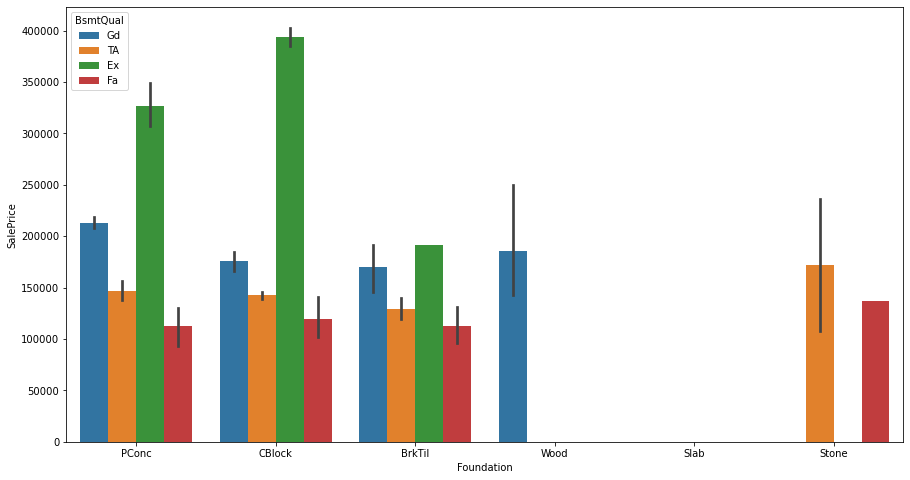

In [166]:
plt.figure(figsize = (15, 8))
sns.barplot(data = train, x = "Foundation", y = "SalePrice", hue = "BsmtQual")

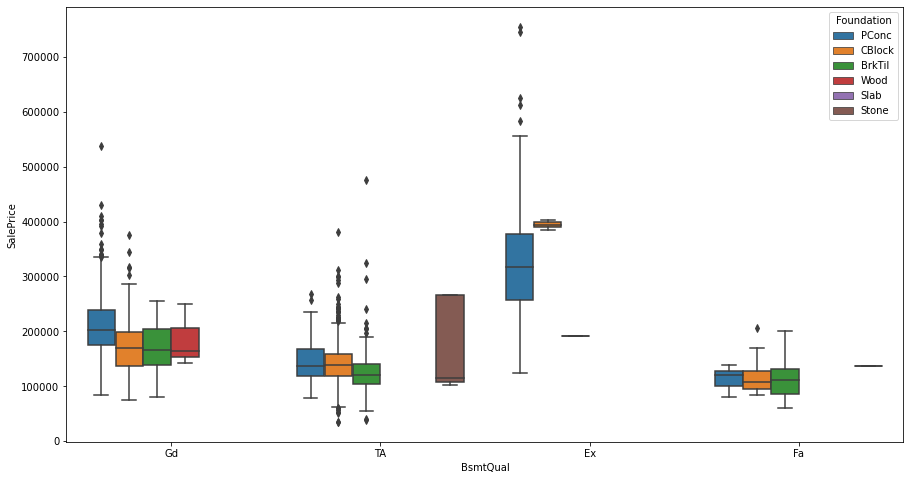

In [165]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = train, x = "BsmtQual", y = "SalePrice", hue = "Foundation")

Foundation 전처리는 전부 해주는게 필요하며 BsmtQual도 마찬가지이다.

PConc의 경우 Ex냐 Gd 여부에 따라 가격차이가 많이 나타난다.

BrkTil의 경우 Gd냐 아니냐에 따라 가격차이가 발생

Stone의 경우 피벗테이블 상에 나타난 것처럼 Ta와 Fa여부에 따라 가격차이가 발생했지만, Fa의 모수가 부족하다는 점은 조금 아쉬운 부분

#### 전처리

In [167]:
train["Foundation(CBlock)"] = train["Foundation"] == "CBlock"
train["Foundation(BrkTil)"] = train["Foundation"] == "BrkTil"

In [168]:
test["Foundation(CBlock)"] = test["Foundation"] == "CBlock"
test["Foundation(BrkTil)"] = test["Foundation"] == "BrkTil"

In [169]:
train["BsmtQual(Typical)"] = train["BsmtQual"] == "TA"
train["BsmtQual(Excellent)"] = train["BsmtQual"] == "Ex"
train["BsmtQual(Good)"] = train["BsmtQual"] == "Gd"
train["BsmtQual(Fair)"] = train["BsmtQual"] == "Fa"

In [170]:
test["BsmtQual(Typical)"] = test["BsmtQual"] == "TA"
test["BsmtQual(Excellent)"] = test["BsmtQual"] == "Ex"
test["BsmtQual(Good)"] = test["BsmtQual"] == "Gd"
test["BsmtQual(Fair)"] = test["BsmtQual"] == "Fa"

### BsmtCond

BsmtQual 과 마찬가지로 지하실 퀄리티가 좋으면 가격도 당연히 상승할 것이다.

In [173]:
train["BsmtCond"].value_counts(), test["BsmtCond"].value_counts()

(TA    1311
 Gd      65
 Fa      45
 Po       2
 Name: BsmtCond, dtype: int64,
 TA    1295
 Fa      59
 Gd      57
 Po       3
 Name: BsmtCond, dtype: int64)

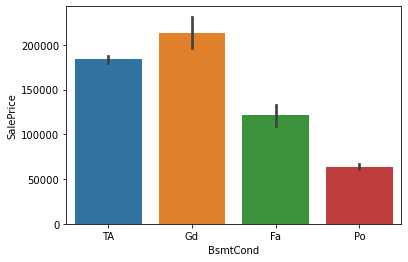

In [174]:
sns.barplot(data = train, x = "BsmtCond", y = "SalePrice")

데이터 대부분이 TA이므로 전처리만 해줘도 충분할 듯 하다.

#### 전처리

In [175]:
train["BsmtCond(Typical)"] = train["BsmtCond"] == "TA"
train["BsmtCond(Good)"] = train["BsmtCond"] == "Gd"
train["BsmtCond(Fair)"] = train["BsmtCond"] == "Fa"
train["BsmtCond(Poor)"] = train["BsmtCond"] == "Po"

In [176]:
test["BsmtCond(Typical)"] = test["BsmtCond"] == "TA"
test["BsmtCond(Good)"] = test["BsmtCond"] == "Gd"
test["BsmtCond(Fair)"] = test["BsmtCond"] == "Fa"
test["BsmtCond(Poor)"] = test["BsmtCond"] == "Po"

### BsmtExposure

노출이 잘 되는 지하실이면 당연히 가격이 높을 것이다.

In [212]:
train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [216]:
pd.pivot_table(train , index = "BsmtExposure", values = "SalePrice")

,SalePrice
BsmtExposure,
Av,206643.420814
Gd,257689.805970
Mn,192789.657895
No,165652.295908


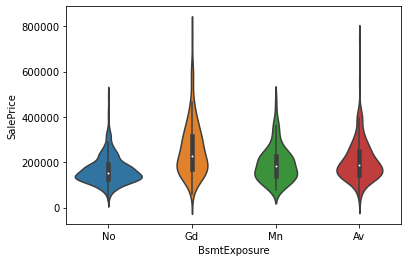

In [217]:
sns.violinplot(data = train , x = "BsmtExposure", y = "SalePrice")

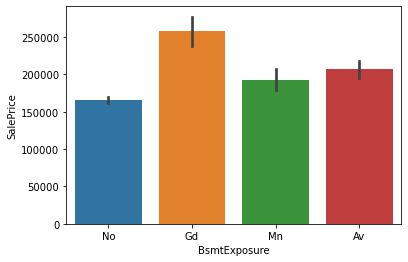

In [218]:
sns.barplot(data = train , x = "BsmtExposure", y = "SalePrice")

노출이 좋을수록 가격이 좋아지는 경향이 나타난다. 

#### 전처리

In [219]:
train["BsmtExposure(Good)"] = train["BsmtExposure"] == "Gd"
train["BsmtExposure(Minimum)"] = train["BsmtExposure"] == "Mn"
train["BsmtExposure(Average)"] = train["BsmtExposure"] == "Av"
train["BsmtExposure(No)"] = train["BsmtExposure"] == "No"

In [220]:
test["BsmtExposure(Good)"] = test["BsmtExposure"] == "Gd"
test["BsmtExposure(Minimum)"] = test["BsmtExposure"] == "Mn"
test["BsmtExposure(Average)"] = test["BsmtExposure"] == "Av"
test["BsmtExposure(No)"] = test["BsmtExposure"] == "No"

### USE DECISION TREE

In [221]:
label_name = "SalePrice"
feature_name = ["class_1_story", "class_2_story", "class_PUD", "class_ages", "class_newer", "class_older", "class_styles", 
               "RL", "RM", "RH", "C", "FV", "Pave(alley)", "Lv1", "Bnk", "Low", "HLS", "LotFrontage(less_40)", "LotConfig(inside)",
               "LotConfig(FR2)", "LotConfig(corner)", "LotConfig(CulDSac)", "LotConfig(FR3)", 'CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
               'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
               'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
               'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
               'Blueste', "Artery", "RRAn", 
                "1Fam", "2fmCon", "Duplex", "TwnhsE", "Twnhs",
               "OverallQual", "OverallCond(5)",
               "YearBuilt(1940)", "YearBuilt(1980)", "YearBuilt(more)",
               "YearRemodAdd(1980)",
                "HouseStyle(1story)", "HouseStyle(2story)", "HouseStyle(Fin)",
                "RoofStyle(Gable)", "RoofStyle(Hip)",
                "RoofMatl(WdShngl)",
                "Exterior1st(VinylSd)", "Exterior1st(MetalSd)", "Exterior1st(Wd Sdng)", "Exterior1st(HdBoard)", "Exterior1st(Plywood)",
                "Exterior2nd(VinylSd)", "Exterior2nd(MetalSd)", "Exterior2nd(Wd Sdng)", "Exterior2nd(HdBoard)", "Exterior2nd(Plywood)",
                "MasVnrType(BrkFace)", "MasVnrType(None)", "MasVnrType(Stone)",
                "ExterQual(clean)",
                "Foundation(PConc)", "Foundation(Wood)", "Foundation(Slab)", "Foundation(Stone)", "Foundation(CBlock)", "Foundation(BrkTil)",
                "BsmtQual(Typical)", "BsmtQual(Excellent)", "BsmtQual(Good)", "BsmtQual(Fair)",
                "BsmtCond(Typical)", "BsmtCond(Good)", "BsmtCond(Fair)", "BsmtCond(Poor)",
                "BsmtExposure(Good)", "BsmtExposure(Average)", "BsmtExposure(Minimum)", "BsmtExposure(No)"
                
               ]
feature_name

['class_1_story',
 'class_2_story',
 'class_PUD',
 'class_ages',
 'class_newer',
 'class_older',
 'class_styles',
 'RL',
 'RM',
 'RH',
 'C',
 'FV',
 'Pave(alley)',
 'Lv1',
 'Bnk',
 'Low',
 'HLS',
 'LotFrontage(less_40)',
 'LotConfig(inside)',
 'LotConfig(FR2)',
 'LotConfig(corner)',
 'LotConfig(CulDSac)',
 'LotConfig(FR3)',
 'CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste',
 'Artery',
 'RRAn',
 '1Fam',
 '2fmCon',
 'Duplex',
 'TwnhsE',
 'Twnhs',
 'OverallQual',
 'OverallCond(5)',
 'YearBuilt(1940)',
 'YearBuilt(1980)',
 'YearBuilt(more)',
 'YearRemodAdd(1980)',
 'HouseStyle(1story)',
 'HouseStyle(2story)',
 'HouseStyle(Fin)',
 'RoofStyle(Gable)',
 'RoofStyle(Hip)',
 'RoofMatl(WdShngl)',
 'Exterior1st(VinylSd)',
 'Exterior1st(MetalSd)',
 'Exterior1st(W

In [222]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual(Good),BsmtQual(Fair),BsmtCond(Typical),BsmtCond(Good),BsmtCond(Fair),BsmtCond(Poor),BsmtExposure(Good),BsmtExposure(Minimum),BsmtExposure(Average),BsmtExposure(No)
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,True,False,True,False,False,False,False,False,False,True
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,True,False,True,False,False,False,True,False,False,False
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,True,False,True,False,False,False,False,True,False,False
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,False,False,True,False,False,False,False,False,True
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,True,False,True,False,False,False,False,False,True,False


In [223]:
x_train = train[feature_name]

In [224]:
y_train = train[label_name]
y_train.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [225]:
x_test = test[feature_name]
x_test.head()

,class_1_story,class_2_story,class_PUD,class_ages,class_newer,class_older,class_styles,RL,RM,RH,...,BsmtQual(Good),BsmtQual(Fair),BsmtCond(Typical),BsmtCond(Good),BsmtCond(Fair),BsmtCond(Poor),BsmtExposure(Good),BsmtExposure(Average),BsmtExposure(Minimum),BsmtExposure(No)
Id,,,,,,,,,,,,,,,,,,,,,
1461,True,False,False,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1462,True,False,False,False,True,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1463,False,True,False,False,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,True
1464,False,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1465,True,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,True


In [226]:
log_x_train = np.log(1 + x_train)
log_y_train = np.log(1 + y_train)
log_x_test = np.log(1 + x_test)

### Model Validation

In [227]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x_train, y_train, test_size = 0.2, random_state = 5)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


1168 1168
292 292


In [117]:
from sklearn.tree import DecisionTreeRegressor

In [228]:
model = DecisionTreeRegressor(random_state = 5,max_depth = 15, min_samples_leaf = 10, min_samples_split = 10)

model

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                      random_state=5)

In [229]:
model.fit(np.log(1 + x_train), np.log(1 + y_train))

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                      random_state=5)

In [230]:

y_train_predict = model.predict(np.log(1 + x_train))
y_test_predict = model.predict(np.log(1 + x_test))



train_score = np.sqrt(((np.log(1 + y_train) - y_train_predict) ** 2).sum() / len(y_train))
test_score = np.sqrt(((np.log(1 + y_test) - y_test_predict) ** 2).sum() / len(y_test))


f"train = {train_score:.6f}, test = {test_score:.6f}"

'train = 0.172563, test = 0.238911'

In [121]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 5, max_depth = 15, min_samples_leaf = 10, min_samples_split = 10)

model

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                      random_state=5)

In [122]:
x_train = train[feature_name]
y_train = train[label_name]
x_test = test[feature_name]

In [123]:
model.fit(np.log(1 + x_train), np.log(1 + y_train))

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                      random_state=5)

In [124]:
y_test_predict = model.predict(np.log(1 + x_test))

y_test_predict = np.exp(y_test_predict) - 1
y_test_predict

array([139024.82853094, 152429.97058922, 159328.7134397 , ...,
       120114.15956367, 120114.15956367, 218311.89836284])

 ### Random Forest Validation

In [231]:
x_train = train[feature_name]
y_train = train[label_name]
x_test = test[feature_name]

In [232]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x_train, y_train, test_size = 0.2, random_state = 5)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


1168 1168
292 292


In [127]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
model = RandomForestRegressor(random_state = 5,
                             n_estimators = 3000,
                              min_samples_leaf = 10,
                              min_samples_split = 10,
                              max_features = 0.8
                             )
log_x_train = np.log(1 + x_train)
log_y_train = np.log(1 + y_train)
log_x_test = np.log(1 + x_test)
log_y_test = np.log(1 + y_test)
model.fit(log_x_train, log_y_train)

RandomForestRegressor(max_features=0.8, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=3000, random_state=5)

In [234]:

y_train_predict = model.predict(log_x_train)
y_test_predict = model.predict(log_x_test)




train_score = np.sqrt(((log_y_train - y_train_predict) ** 2).sum() / len(y_train))
test_score = np.sqrt(((log_y_test - y_test_predict) ** 2).sum() / len(y_test))


f"train = {train_score:.6f}, test = {test_score:.6f}"

'train = 0.170144, test = 0.220995'

### Use Random Forest

In [235]:
x_train = train[feature_name]
y_train = train[label_name]
x_test = test[feature_name]

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
model = RandomForestRegressor(random_state = 5,
                             n_estimators = 3000,
                              min_samples_leaf = 10,
                              min_samples_split = 10,
                              max_features = 0.8
                             )
log_x_train = np.log(1 + x_train)
log_y_train = np.log(1 + y_train)
log_x_test = np.log(1 + x_test)
log_y_test = np.log(1 + y_test)
model.fit(log_x_train, log_y_train)

RandomForestRegressor(max_features=0.8, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=3000, random_state=5)

In [133]:
y_test_predict = model.predict(log_x_test)

y_test_predict = np.exp(y_test_predict) - 1
y_test_predict

array([120560.94673398, 151621.11611394, 156575.2679154 , ...,
       134139.91083242, 142100.41297791, 208257.42598949])

### Validation Gradient Boosting Machine

In [237]:
x_train = train[feature_name]
y_train = train[label_name]
x_test = test[feature_name]

In [238]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x_train, y_train, test_size = 0.2, random_state = 5)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


1168 1168
292 292


In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [239]:
model = GradientBoostingRegressor(n_estimators = 1000,
                                   learning_rate = 0.035,
                                   random_state = 5)
log_x_train = np.log(1 + x_train)
log_y_train = np.log(1 + y_train)
log_x_test = np.log(1 + x_test)
log_y_test = np.log(1 + y_test)
model.fit(log_x_train, log_y_train)

GradientBoostingRegressor(learning_rate=0.035, n_estimators=1000,
                          random_state=5)

In [240]:

y_train_predict = model.predict(log_x_train)
y_test_predict = model.predict(log_x_test)




train_score = np.sqrt(((log_y_train - y_train_predict) ** 2).sum() / len(y_train))
test_score = np.sqrt(((log_y_test - y_test_predict) ** 2).sum() / len(y_test))


f"train = {train_score:.6f}, test = {test_score:.6f}"

'train = 0.112496, test = 0.188273'

### Use Gradient Boosting Machine

In [241]:
x_train = train[feature_name]
y_train = train[label_name]
x_test = test[feature_name]

In [242]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 1000,
                                   learning_rate = 0.035,
                                   random_state = 5)
log_x_train = np.log(1 + x_train)
log_y_train = np.log(1 + y_train)
log_x_test = np.log(1 + x_test)
log_y_test = np.log(1 + y_test)
model.fit(log_x_train, log_y_train)

GradientBoostingRegressor(learning_rate=0.035, n_estimators=1000,
                          random_state=5)

In [243]:
y_test_predict = model.predict(log_x_test)

y_test_predict = np.exp(y_test_predict) - 1
y_test_predict

array([121231.84895917, 154583.60846953, 165556.63511841, ...,
       134629.1504104 , 137552.1567371 , 200318.89321626])

In [244]:
submit = pd.read_csv("sample_submission.csv", index_col = "Id")

submit["SalePrice"] = y_test_predict

submit

,SalePrice
Id,
1461,121231.848959
1462,154583.608470
1463,165556.635118
1464,178546.680778
1465,188002.343576
...,...
2915,84606.104361
2916,84974.397433
2917,134629.150410


In [245]:
submit.to_csv("sample_submission.csv")